In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.6, color_codes=True)

In [68]:
# SELECT 
#     Sentence.file_id AS 'Presidential Debate Date',
#     COUNT(*) AS 'No. of Sentences'
# FROM
#     factchecker_presidential_debate.Sentence,
#     Speaker_File
# WHERE
#     Sentence.file_id = Speaker_File.file_id
#         AND Sentence.speaker_id = Speaker_File.speaker_id
#         AND role = 'interviewee'
#         AND length >= 5
# GROUP BY Sentence.file_id
# ORDER BY Sentence.file_id;
sentence_debate = pd.read_csv('sentence_debate.csv')
sentence_debate.columns

Index(['Presidential Debate Date', 'No. of Sentences'], dtype='object')

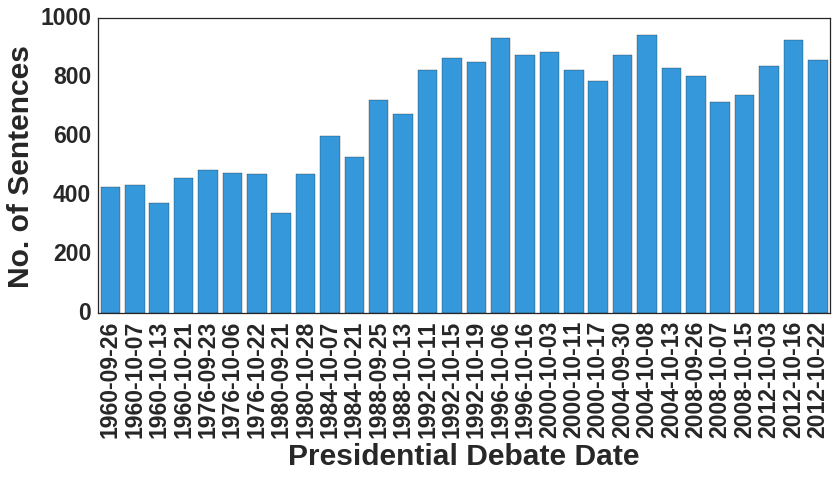

In [140]:
fig, ax = plt.subplots(figsize=(12,7))
plt.xticks(rotation=90)

sns.set_style("whitegrid")
ax.set_axis_bgcolor('white')
sns.barplot(ax=ax, x="Presidential Debate Date", y="No. of Sentences", 
                 data=sentence_debate, color="#3498db", saturation = 1.0)

xticks = [item.get_text().replace('.txt', '') for item in ax.get_xticklabels()]
ax.set_xticklabels(xticks)

ax.set_xlabel("Presidential Debate Date", fontsize=30, fontweight='bold')
ax.set_ylabel("No. of Sentences", fontsize=30, fontweight='bold')

plt.tick_params(labelsize=23)
plt.tight_layout()

plt.savefig('sentence_debate.eps', format='eps', dpi=1200)


In [93]:
# select USERNAME,PROFESSION,RANK_E,RANK_W,ANSWERED as '#', A.SKIPPED/A.ANSWERED as SKIP, A.LEN,round(A.LEN/18.4217*A.ANSWERED*sign(0.3 - A.RANK_W)*pow((0.3 - A.RANK_W),2),2) AS RANK_L,
# 	if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0) ),2), 0) as Quality,
# 	if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0) )*pow((A.LEN/18.4217), 1.5)*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) as PAYRATE,
# 	if(ANSWERED >= 50, round(if( RANK_W <= 0, 3-7*RANK_W/0.2, if(RANK_W<=0.3, pow((0.3-RANK_W)/0.3, 2.5)*3, 0) )*pow((A.LEN/18.4217), 1.5)*ANSWERED/100*pow(0.6, A.SKIPPED/A.ANSWERED),2), 0) as PAYMENT,
# 	NFS,NO,YES,NFS_NFS,NFS_NO,NFS_YES,NO_NFS,NO_NO,NO_YES,YES_NFS,YES_NO,YES_YES from (select 
#     Sentence_User.username as USERNAME, profession as PROFESSION, 
	
# 	round((pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = -1 and response = -1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = -1 and response = 0, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = -1 and response = 1, 1, 0))/sum(if(screening = -1 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = 0 and response = -1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = -1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = 0 and response = 0, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 0, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2)+
# 	pow(sum(if(screening = 0 and response = 1, 1, 0))/sum(if(screening = 0 and response != -2, 1, 0))-sum(if(screening = 1 and response = 1, 1, 0))/sum(if(screening = 1 and response != -2, 1, 0)),2))/(3*2), 3) as RANK_E,

# 	round(-0.2*(sum(if(screening = -1 and response = -1, 1, 0))+sum(if(screening = 0 and response = 0, 1, 0))+sum(if(screening = 1 and response = 1, 1, 0)))/(sum(screening != -3 and response != -2))
# 	+0.7*(sum(if(screening = 0 and response = 1, 1, 0))+sum(if(screening = 1 and response = 0, 1, 0)))/(sum(screening != -3 and response != -2))
# 	+0.7*(sum(if(screening = -1 and response = 0, 1, 0))+sum(if(screening = 0 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2))
# 	+2.5*(sum(if(screening = -1 and response = 1, 1, 0))+sum(if(screening = 1 and response = -1, 1, 0)))/(sum(screening != -3 and response != -2)), 3) as RANK_W,
	
# 	sum(if(Sentence_User.response != -2, 1, 0)) as ANSWERED,
# 	sum(if(Sentence_User.response = -2, 1, 0)) as SKIPPED,
# 	avg(if(Sentence_User.response != -2, length, null)) as LEN,
	
# 	sum(if(response = -1,1,0)) as NFS,
# 	sum(if(response = 0,1,0)) as NO,
# 	sum(if(response = 1,1,0)) as YES,

#     sum(if(screening = -1 and response = -1, 1, 0)) as NFS_NFS,
# 	sum(if(screening = -1 and response = 0, 1, 0)) as NFS_NO,
# 	sum(if(screening = -1 and response = 1, 1, 0)) as NFS_YES,
# 	sum(if(screening = 0 and response = -1, 1, 0)) as NO_NFS,
# 	sum(if(screening = 0 and response = 0, 1, 0)) as NO_NO,
# 	sum(if(screening = 0 and response = 1, 1, 0)) as NO_YES,
# 	sum(if(screening = 1 and response = -1, 1, 0)) as YES_NFS,
# 	sum(if(screening = 1 and response = 0, 1, 0)) as YES_NO,
# 	sum(if(screening = 1 and response = 1, 1, 0)) as YES_YES
# from
#     Sentence_User,
#     Sentence,
# 	User
# where
#     id = sentence_id and
# 	Sentence_User.username = User.username and
# 	Sentence_User.username != "factchecker" and
# 	sentence_id not in (129, 1576, 3110, 3429, 4390, 5553, 5562, 5654, 5974, 6002, 6483, 7600, 9017, 9355, 9862, 10060, 10762, 10863, 11025, 11112, 14933, 611, 15445, 15602, 15763, 16014, 16015, 16258, 16828, 17000, 17159, 17420, 17509, 21636, 24352, 26145, 27100, 27828, 27986, 28777)
# group by Sentence_User.username) A order by PAYMENT desc;
performance = pd.read_csv('user_performance.csv')
performance = performance.dropna(subset = ['RANK_W'])

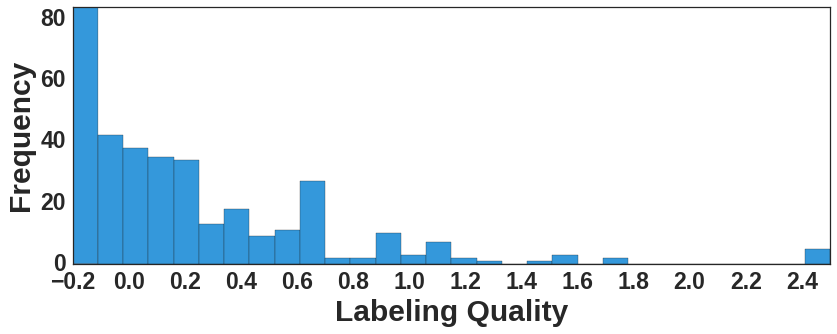

In [149]:
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(12,5))

labels = []
i = -0.2
while(i <= 2.5):
    labels += [i]
    i += 0.2
plt.xticks(labels)
labels = [l*10 for l in range(0,12) if l%2 == 0]
plt.yticks(labels)
ax = sns.distplot(performance.RANK_W, kde=False, bins = 30, hist_kws={"color": "#3498db", "alpha": 1.0})

ax.set_xlabel("Labeling Quality", fontsize=30, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=30, fontweight='bold')

plt.tick_params(labelsize=23)
plt.tight_layout()

plt.savefig('labeling_quality.eps', format='eps', dpi=1200)

In [139]:
# SELECT 
#     sentence_id, text, sentiment, length,
#     SUM(IF(response = - 1, 1, 0)) AS nfs,
#     SUM(IF(response = 0, 1, 0)) AS ufs,
#     SUM(IF(response = 1, 1, 0)) AS cfs, -1 as verdict
# FROM
#     Sentence_User,
#     Sentence
# WHERE
# 	sentiment is not null and
#     Sentence.id = Sentence_User.sentence_id
#         AND screening = - 3
#         AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'Connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'factchecker', 'farz2017', 'FenLu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'hmwaterman', 'ijd1880', 'isai17', 'ishwor', 'j.kathryn', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rohit', 'rpadilam', 'ruchitengse', 'sami001', 'sarika3392', 'shingaviaa', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'zwj')
# GROUP BY sentence_id
# HAVING
# 	(nfs >= 2
#     AND nfs / (nfs + ufs + cfs) > ufs / (nfs + ufs + cfs)
#     AND nfs / (nfs + ufs + cfs) > cfs / (nfs + ufs + cfs))
    
# UNION

# SELECT 
#     sentence_id, text, sentiment, length,
#     SUM(IF(response = - 1, 1, 0)) AS nfs,
#     SUM(IF(response = 0, 1, 0)) AS ufs,
#     SUM(IF(response = 1, 1, 0)) AS cfs, 0 as verdict
# FROM
#     Sentence_User,
#     Sentence
# WHERE
# 	sentiment is not null and
#     Sentence.id = Sentence_User.sentence_id
#         AND screening = - 3
#         AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'Connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'factchecker', 'farz2017', 'FenLu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'hmwaterman', 'ijd1880', 'isai17', 'ishwor', 'j.kathryn', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rohit', 'rpadilam', 'ruchitengse', 'sami001', 'sarika3392', 'shingaviaa', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'zwj')
# GROUP BY sentence_id
# HAVING
# 	(ufs >= 2
#     AND ufs / (nfs + ufs + cfs) > nfs / (nfs + ufs + cfs)
#     AND ufs / (nfs + ufs + cfs) > cfs / (nfs + ufs + cfs))
    
# UNION

# SELECT 
#     sentence_id, text, sentiment, length,
#     SUM(IF(response = - 1, 1, 0)) AS nfs,
#     SUM(IF(response = 0, 1, 0)) AS ufs,
#     SUM(IF(response = 1, 1, 0)) AS cfs, 1 as verdict
# FROM
#     Sentence_User,
#     Sentence
# WHERE
# 	sentiment is not null and
#     Sentence.id = Sentence_User.sentence_id
#         AND screening = - 3
#         AND username IN ('66styx', 'abhishekm001', 'ajdashdash', 'alexx', 'Alucard', 'anacenriquez', 'anagnew', 'anna.prieto', 'Arnav', 'ayub1993', 'benderwd40', 'big_korea23', 'Carolina1215', 'chengkai', 'ciaraanderson', 'CodyBonBon', 'Connahmac', 'Czecher', 'damianj', 'danb11', 'dariansmith55', 'dlehddbs92', 'don', 'dustinh', 'dylan.bradley', 'etown888', 'factchecker', 'farz2017', 'FenLu', 'ftmdgn', 'gensheng.zhang', 'gryder', 'hmwaterman', 'ijd1880', 'isai17', 'ishwor', 'j.kathryn', 'jamiedenison', 'Jasminbe', 'JE_4489', 'jkjames', 'k.john', 'kakon', 'kamivinton', 'kmilosch', 'layton0914', 'Leaf90', 'lnwomble', 'LuanNguyen', 'maithili', 'MarkT', 'matthew.baker37', 'minmol', 'Monica_16', 'mwaragon', 'naeemulhassan', 'nandish', 'natashaaroberts', 'NIGESH', 'pclanshih', 'pec6938', 'Pooya', 'rafaelsears', 'rohit', 'rpadilam', 'ruchitengse', 'sami001', 'sarika3392', 'shingaviaa', 'simmonsjr', 'solanisayz', 'sona', 'ssroy_2007', 'stefaguas', 'sumeshnb', 'szenner1', 'test', 'TheMagnusOpus', 'thesamhale', 'tulsic', 'v3nd3774', 'viralmehta', 'vk444', 'wgspft', 'whu1982', 'zwj')
# GROUP BY sentence_id
# HAVING
# 	(cfs >= 2
#     AND cfs / (nfs + ufs + cfs) > ufs / (nfs + ufs + cfs)
#     AND cfs / (nfs + ufs + cfs) > nfs / (nfs + ufs + cfs))
sentences = pd.read_csv('sentences.csv')